# PROJECT 2: WRANGLE AND INVESTIGATE _WeRateDogs_ TWITTER ARCHIVE DATA

## Table of Content
<a href='#intro'>INTRODUCTION</a>
<a href='#gather'>Data Gathering</a>
<a href='#assess'>Data Assessing</a>
<a href='#clean'>Data Cleaning</a>
<a href='#store'>Storing Data<a>
<a href='#analyze'>Analyzing and Visualizing Data</a>
<a href='#conclude'>Conclusion</a>   

<a id='intro'></a>
> ## Introduction

The Dataset to be wrangle and analysed are the tweets and retweets from twitter user [@dog_rate](https://twitter.com/dog_rates?s=20&t=5Up0P4K1RgdKgF0eJf2PGw) which is an account that rates fantastic dogs with humorous comments.
<br>
The Wrangling and Analysis will help draw meaningful insights about dogs in general and its relations to people.

In [1]:
# Import the necessary Packages
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from timeit import default_timer as timer

<a id='gather'></a>
> ## Data Gathering

### Twitter Archive Dataset
Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Load the 'twitter_archive' into this jupyter notebook
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Image Prediction Dataset
Programmatcially Downloading the 'image_predictions' dataset from Udacity's Server using the Request into created folder in the system and loading it into jupyter notebook

In [3]:
# Create a new folder called 'image_predictions' in system
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
# Requests respond from the server for this URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
# Spiting and writing the URL's response into our empty 'image_predictions' folder
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
# Load the Image_predictions into juypyter notebook
image_predictions = pd.read_csv(r'C:\Users\onuke\Data_Wrangling Udacity Project\image_predictions\image-predictions.tsv', sep = '\t')

### Twitter API Dataset
After querying Twitter API, load the JSON text into an empty list and create a Panda Dataframe with the data.

In [7]:
# Append JSON file to Emptylist and create a panda table
tweets_list = []
with open('tweet-json.txt','r') as file:
    for line in file:
        twitter_api = json.loads(line)
        tweets_list.append(twitter_api)
    twitter_api = pd.DataFrame(tweets_list, columns=['id', 'retweet_count','favorite_count'])

<a id='assess'></a>
>## Data Assessing

Load the Three (3) Dataset and Visuall and Programmatically assess them for any arnomalities.

### 1. Twitter Archive 

#### Visual Assessment 

In [8]:
# Display Twitter_Archive file
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


 ##### Visually Assessed Issue:
    
- Missing values in most of the columns
- Original TWEETS and RETWEETS are mixed
- The 'source' column looks untidy and cumbersome 
- expand the text column

#### Programmatic Assessment
It involves using .info() .describe .sample() etc. in our dataset to Assess it

In [9]:
# Use .info() to see the makeup of each columns details
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# Sample 10 random rows
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
221,849776966551130114,NaN,NaN,2017-04-06 00:13:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys? Again? We only rate dogs. Plea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849776966...,12,10,None,None,None,None,None
2039,671547767500775424,NaN,NaN,2015-12-01 04:33:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marley. She chews shoes then feels ext...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671547767...,10,10,Marley,None,None,None,None
201,853760880890318849,NaN,NaN,2017-04-17 00:03:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Alice. I'm told she enjoys car ri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853760880...,12,10,Alice,None,None,None,None
388,826598365270007810,NaN,NaN,2017-02-01 01:09:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pawnd... James Pawnd. He's suave af. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826598365...,13,10,Pawnd,None,None,None,None
634,793614319594401792,NaN,NaN,2016-11-02 00:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When she says you're a good boy...,7.916723e+17,4.196984e+09,2016-10-27 16:06:04 +0000,https://twitter.com/dog_rates/status/791672322...,13,10,None,None,None,None,None
518,810657578271330305,NaN,NaN,2016-12-19 01:26:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pavlov. His floatation device has fail...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810657578...,11,10,Pavlov,None,None,None,None
1872,675146535592706048,NaN,NaN,2015-12-11 02:54:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. He's yelling at the carpet. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675146535...,7,10,Coops,None,None,None,None
839,767191397493538821,NaN,NaN,2016-08-21 02:47:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I don't know any of the backstory behind this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/767191397...,13,10,None,doggo,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
990,748705597323898880,NaN,NaN,2016-07-01 02:31:39 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",#BarkWeek is getting rather heckin terrifying ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748705597...,13,10,None,None,None,None,None


In [11]:
# list unique values in the 'name' column
twitter_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [12]:
# Value_count details for each stage of dogs
doggo = twitter_archive.doggo.value_counts()
floofer = twitter_archive.floofer.value_counts()
pupper = twitter_archive.pupper.value_counts()
puppo = twitter_archive.puppo.value_counts()
print(doggo); 
print(floofer); 
print(pupper); 
print(puppo)

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [13]:
twitter_archive.source.value_counts();

##### Programmatically Assessed issues:
- erroreonus datatypes: `tweet_id` to object (string) datatype `timestamp` to datetime datatype
<br>

- The `name` column has some name with only one alphabet like __a__ and __None__

- Dog stage issue: accomdate the different dog stages in column into one column
                        

### 2. Image Predictions

#### Visual Assessment

In [14]:
# Display of 'image_prediction' file
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


##### Visually Assessed Issue: 
- Dog's name in `p1`, `p2` and `p3` has inconsistency capitalization
- Non-descriptive column name for Dog's name in `p1`, `p2`, `p3`
- Underscore '_' used instead of space in dog breeds `p1`, `p2`, `p3` value name

#### Programmatic Assesmment

In [15]:
# dot info to see the structure of the columns
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
859,696894894812565505,https://pbs.twimg.com/media/CaveNQcVIAECyBr.jpg,1,Appenzeller,0.665628,True,beagle,0.104795,True,Greater_Swiss_Mountain_dog,0.067868,True
1634,805958939288408065,https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg,1,Irish_setter,0.574557,True,golden_retriever,0.339251,True,seat_belt,0.046108,False
271,670823764196741120,https://pbs.twimg.com/media/CU8-puBWwAAR8Xl.jpg,1,Labrador_retriever,0.947453,True,German_short-haired_pointer,0.017001,True,Weimaraner,0.015432,True
929,702932127499816960,https://pbs.twimg.com/media/CcFRCfRW4AA5a72.jpg,1,wallaby,0.410710,False,wombat,0.239332,False,beaver,0.149605,False
1487,782021823840026624,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,1,golden_retriever,0.383223,True,cocker_spaniel,0.165930,True,Chesapeake_Bay_retriever,0.118199,True
1680,813800681631023104,https://pbs.twimg.com/media/C0szZh_XUAAm9je.jpg,1,malamute,0.501159,True,Siberian_husky,0.228792,True,Eskimo_dog,0.200388,True
1330,757597904299253760,https://pbs.twimg.com/media/CoOGZjiWAAEMKGx.jpg,1,doormat,0.836106,False,wallet,0.056627,False,purse,0.051333,False
854,696488710901260288,https://pbs.twimg.com/media/CapsyfkWcAQ41uC.jpg,1,briard,0.369063,True,Scotch_terrier,0.168204,True,giant_schnauzer,0.120553,True
910,700747788515020802,https://pbs.twimg.com/media/CbmOY41UAAQylmA.jpg,1,Great_Pyrenees,0.481333,True,Samoyed,0.311769,True,Maltese_dog,0.074962,True
1229,745433870967832576,https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg,1,barrow,0.999962,False,basset,0.000014,True,wok,0.000006,False


##### Programmatically assessed issues:
   - Erroronous Datatype: `tweet_id` to object (string) datatype

### 3. Twiiter API

#### Visual Assessment

In [17]:
# Display 'twitter_api' file
twitter_api

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


##### Visually Assessed Issue:
   - The column `id` should be changed to `tweet_id` as in twitter archive dataset

#### Programmatic Assessment

In [18]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


##### Programmatically Assessed Issues:
   - Erroronous Datatype: `tweet_id` to object (string) datatype

> **NOTE:** We need to Segment our Issues into **Quality Issues** and **Tidiness Issues** for Easy and Proper Cleaning and Aanlysis.

#### Quality Issues Summary:
__Issue 1:__ <a href='#invalid'>Invalid Dog's name in the `name` column like 'a', 'None', 'The'</a>


__Issue 2:__ <a href='rwt'>Original TWEETS and RETWEETS are mixed in twitter_arc_clean dataset.</a>


__Issue 3:__ <a href='#miss'>Missing values in most of the columns in _twitter archive_ dataset and unwanted column in _image pred_ dataset </a>


__Issue 4:__<a href='#twtid'>Uncorresponding tweet indentifier column name between Datasets</a>


__Issue 5:__<a href='descript'>Column Issues: Non-descriptive, wordy column naming in all tables and narrow `source` column width


__Issue 6:__<a href='case'>Dog's name in `p1`, `p2` and `p3` has inconsistency letter casing in image_pred_clean table


__Issue 7:__<a href='datatype'>Erroronuos Datatypes in datasets


__Isuue 8:__<a href='Uscore'>Underscore '_' used instead of space in the dog breeds `p1`, `p2`, `p3` value name in image_prediction table

#### Tidiness Issues Summary:
__Issue 1:__<a href='dogstage'>Dogs stages issue: `doggo`, `floofer`, `pupper` and `puppo` columns should be one column.
    
__Issue 2:__<a href='source'>The `source` column looks untidy and unreadable.


__Issue 3:__<a href='merge'>Merge all 3 Datasets.

<a id='clean'></a>
> ## Data Cleaning

Before begining cleaning proper, we assign the copy of the original dataset to a variable to avoid tampering with the original Dataset

In [19]:
twitter_arc_clean = twitter_archive.copy()
image_pred_clean = image_predictions.copy()
twitter_api_clean = twitter_api.copy()

__Quality__
<a id='invalid'></a>
> ### 1. Invalid Dog's name in the 'name' column like 'a', 'None', 'The'

#### _Define_

Select all Dogs name that are 'None' and 'a' and 'The' and drop the rows

#### _Code_

In [20]:
# Drop rows with "None" dog name
twitter_arc_clean.drop(twitter_arc_clean.loc[twitter_arc_clean['name']=='None'].index, inplace=True)

# Drop rows with 'a' dog name
twitter_arc_clean.drop(twitter_arc_clean.loc[twitter_arc_clean['name']=='a'].index, inplace=True)

# Drop rows with 'the' dog name
twitter_arc_clean.drop(twitter_arc_clean.loc[twitter_arc_clean['name']=='the'].index, inplace=True)

#### _Test_

In [21]:
twitter_arc_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2011,672245253877968896,NaN,NaN,2015-12-03 02:45:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snickers. He's adorable. Also comes in t-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672245253...,12,10,Snickers,None,None,None,None
2098,670727704916926465,NaN,NaN,2015-11-28 22:15:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrie. He's a handheld pup. Excellen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670727704...,10,10,Jeffrie,None,None,None,None
2064,671154572044468225,NaN,NaN,2015-11-30 02:31:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Holly. She's trying to teach small human-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671154572...,11,10,Holly,None,None,None,None
371,828408677031882754,NaN,NaN,2017-02-06 01:03:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bear. He went outside to play in the s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828408677...,12,10,Bear,None,None,None,None
2019,672125275208069120,NaN,NaN,2015-12-02 18:48:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just impressive I have nothing else to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672125275...,11,10,just,None,None,None,None
1374,701952816642965504,NaN,NaN,2016-02-23 02:12:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rilo. He's a Northern Curly Ticonderoga. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701952816...,11,10,Rilo,None,None,None,None
2174,669216679721873412,NaN,NaN,2015-11-24 18:11:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clarq. He's a golden Quetzalcoatl. Cla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669216679...,8,10,Clarq,None,None,None,None
1536,689905486972461056,NaN,NaN,2016-01-20 20:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gizmo. He's quite the pupper. Con...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689905486...,11,10,Gizmo,None,None,pupper,None
1984,672902681409806336,NaN,NaN,2015-12-04 22:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimison. He's stuck in a pot. Damn it ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672902681...,9,10,Jimison,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None


In [22]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 2349
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1548 non-null   int64  
 1   in_reply_to_status_id       1 non-null      float64
 2   in_reply_to_user_id         1 non-null      float64
 3   timestamp                   1548 non-null   object 
 4   source                      1548 non-null   object 
 5   text                        1548 non-null   object 
 6   retweeted_status_id         116 non-null    float64
 7   retweeted_status_user_id    116 non-null    float64
 8   retweeted_status_timestamp  116 non-null    object 
 9   expanded_urls               1548 non-null   object 
 10  rating_numerator            1548 non-null   int64  
 11  rating_denominator          1548 non-null   int64  
 12  name                        1548 non-null   object 
 13  doggo                       1548 

<a id='rwt'></a>
> ### 2. Original TWEETS and RETWEETS are mixed in _twitter_arc_clean_ dataset.

#### _Define_

In _twitter_arc_clean_ dataset, since original tweets are needed, Remove retweeted tweet using the 'retweeted_status_id' column and `.drop()`function

#### _Code_

In [23]:
# Select and Assigning retweet variable
retweets = twitter_arc_clean[twitter_arc_clean['retweeted_status_id'].notnull()]

In [24]:
# Display retweet
retweets.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None


In [25]:
# Drop Retweet 
twitter_arc_clean.drop(retweets.index, axis=0, inplace=True)

#### _Test_

In [26]:
twitter_arc_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,666418789513326592,NaN,NaN,2015-11-17 00:53:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He is an Alaskan Terrapin. Lov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666418789...,10,10,Walter,None,None,None,None
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [27]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1432 entries, 0 to 2349
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1432 non-null   int64  
 1   in_reply_to_status_id       1 non-null      float64
 2   in_reply_to_user_id         1 non-null      float64
 3   timestamp                   1432 non-null   object 
 4   source                      1432 non-null   object 
 5   text                        1432 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1432 non-null   object 
 10  rating_numerator            1432 non-null   int64  
 11  rating_denominator          1432 non-null   int64  
 12  name                        1432 non-null   object 
 13  doggo                       1432 

<a id='miss'></a>
> ### 3. Missing values in most of the columns in _twitter archive_ dataset and unwanted column in _image pred_ dataset

#### _Define_

- Remove columns with missing values using `.dropna()`
- Drop the __img_num__ column in the _image_pred_clean_ table

#### _Code_

In [28]:
# Drop columns with missing values
twitter_arc_clean.dropna(axis='columns', inplace=True)

In [29]:
# Drop 'img_num' column
image_pred_clean.drop(columns='img_num', inplace=True)

#### _Test_

In [30]:
list(twitter_arc_clean.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [31]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1432 entries, 0 to 2349
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1432 non-null   int64 
 1   timestamp           1432 non-null   object
 2   source              1432 non-null   object
 3   text                1432 non-null   object
 4   expanded_urls       1432 non-null   object
 5   rating_numerator    1432 non-null   int64 
 6   rating_denominator  1432 non-null   int64 
 7   name                1432 non-null   object
 8   doggo               1432 non-null   object
 9   floofer             1432 non-null   object
 10  pupper              1432 non-null   object
 11  puppo               1432 non-null   object
dtypes: int64(3), object(9)
memory usage: 145.4+ KB


<a id='twtid'></a>
> ### 4. Uncorresponding tweet indentifier column name between Datasets

For uniformity and smoother merging of dataseta, we need to change the `id` column name to `tweet_id` to tally the twitter archive corresponding column.
Change `id` column name to `tweet_id` in the 'twitter_api' dataset

#### _Define_

In the twitter_api table, change the column name __id__ to __tweet_id__ using the `.rename()` function

#### _Code_

In [32]:
twitter_api_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### _Test_

In [33]:
twitter_api_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


<a id='descript'></a>
> ### 5. Column Issues: Non-descriptive, wordy column naming in all tables and narrow 'source' column width

#### _Define_

- In the _twitter_arc_clean_ table, the column names __rating_denominator__, __rating_numerator__ and __expanded_urls__ should be changed to __rate_denom__, __rate_num__ and __tweet_urls__ respectively to make it not too wordy using `.rename()` function.

- In _image_pred_clean_ table, the column name __p1__, __p2__ and __p3__ should be changed to __p1_breed_, __p2_breed__and __p3_breed__ respectively to give a more descriptive column name using the `.rename()` function

- Expand the 'source' column in the _twitter_arc_clean_ table for fuller view using `.style.set_properties()` function.

#### _Code_

In [34]:
# Rename some column names in archive table
twitter_arc_clean.rename(columns={'rating_denominator': 'rate_denom', 'rating_numerator': 'rate_num', 'expanded_urls': 'tweet_urls'}, inplace=True)

In [35]:
# Rename some column names in image prediction table
image_pred_clean.rename(columns={'p1': 'p1_breed', 'p2': 'p2_breed', 'p3': 'p3_breed'}, inplace=True)

In [36]:
# Expand the 'source' column
twitter_arc_clean.style.set_properties(subset=['text'], **{'width': '300px'})

,tweet_id,timestamp,source,text,tweet_urls,rate_num,rate_denom,name,doggo,floofer,pupper,puppo
0,892420643555336192,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343424,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
6,890971913173991424,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,890240255349198848,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,None,None,None
10,890006608113172480,2017-07-26 00:31:25 +0000,Twitter for iPhone,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,"https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1",13,10,Koda,None,None,None,None
11,889880896479866880,2017-07-25 16:11:53 +0000,Twitter for iPhone,This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g,https://twitter.com/dog_rates/status/889880896479866881/photo/1,13,10,Bruno,None,None,None,None


#### _Test_

In [37]:
list(twitter_arc_clean.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'tweet_urls',
 'rate_num',
 'rate_denom',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [38]:
list(image_pred_clean.columns)

['tweet_id',
 'jpg_url',
 'p1_breed',
 'p1_conf',
 'p1_dog',
 'p2_breed',
 'p2_conf',
 'p2_dog',
 'p3_breed',
 'p3_conf',
 'p3_dog']

In [39]:
twitter_arc_clean

,tweet_id,timestamp,source,text,tweet_urls,rate_num,rate_denom,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2325,666418789513326592,2015-11-17 00:53:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He is an Alaskan Terrapin. Lov...,https://twitter.com/dog_rates/status/666418789...,10,10,Walter,None,None,None,None
2326,666411507551481857,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None
2333,666337882303524864,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


<a id='case'></a>
> ### 6. Dog's name in p1, p2 and p3 has inconsistency letter casing in _image_pred_clean_ table.

#### _Define_
- In the _image_pred_clean_ table, the breed name(__p1, p2, p3__) should all be convertede to lowercase using `.lower()`

#### _Code_

In [40]:
# Convert all breed name to lowercase
image_pred_clean['p1_breed'] = image_pred_clean['p1_breed'].str.lower()
image_pred_clean['p2_breed'] = image_pred_clean['p2_breed'].str.lower()
image_pred_clean['p3_breed'] = image_pred_clean['p3_breed'].str.lower()

#### _Test_

In [41]:
image_pred_clean.p1_breed.sample(10)

616       brittany_spaniel
1575      golden_retriever
79      labrador_retriever
1689       german_shepherd
1901              cardigan
2041    labrador_retriever
1359      blenheim_spaniel
1727      golden_retriever
711                   chow
1856      military_uniform
Name: p1_breed, dtype: object

In [42]:
image_pred_clean.p2_breed.sample(10)

106                  prayer_rug
934             standard_poodle
313     black-and-tan_coonhound
1662             french_bulldog
1295                      teddy
947                   chihuahua
1075         labrador_retriever
367                         pug
2063         labrador_retriever
1734    black-and-tan_coonhound
Name: p2_breed, dtype: object

In [43]:
image_pred_clean.p3_breed.sample(10)

2013                  pembroke
1545           tibetan_terrier
114               newfoundland
292                toy_terrier
1340    curly-coated_retriever
218                 eskimo_dog
500             french_bulldog
963               bull_mastiff
884                 shower_cap
1490                 seat_belt
Name: p3_breed, dtype: object

In [44]:
image_pred_clean.sample(10)

,tweet_id,jpg_url,p1_breed,p1_conf,p1_dog,p2_breed,p2_conf,p2_dog,p3_breed,p3_conf,p3_dog
400,673688752737402881,https://pbs.twimg.com/media/CVlsVs3WIAAja6m.jpg,soft-coated_wheaten_terrier,0.340806,True,sealyham_terrier,0.234898,True,kuvasz,0.203495,True
452,674752233200820224,https://pbs.twimg.com/media/CV0zkzEU4AAzLc5.jpg,vizsla,0.665516,True,redbone,0.173366,True,basset,0.134783,True
1692,815990720817401858,https://pbs.twimg.com/media/C1L7OVVWQAIQ6Tt.jpg,chihuahua,0.428756,True,miniature_pinscher,0.103912,True,staffordshire_bullterrier,0.088959,True
518,676470639084101634,https://pbs.twimg.com/media/CWNOdIpWoAAWid2.jpg,golden_retriever,0.790386,True,borzoi,0.022885,True,dingo,0.015343,False
317,671744970634719232,https://pbs.twimg.com/media/CVKEfMKWoAAR-Ud.jpg,ice_bear,0.251193,False,ram,0.213839,False,arctic_fox,0.081551,False
192,669567591774625800,https://pbs.twimg.com/media/CUrIK1DWoAAhECq.jpg,chihuahua,0.980511,True,toy_terrier,0.009166,True,miniature_pinscher,0.002659,True
986,707693576495472641,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,bathtub,0.499525,False,tub,0.488014,False,washbasin,0.009298,False
1830,836260088725786625,https://pbs.twimg.com/media/C5r-G2IUwAA6KBY.jpg,borzoi,0.564688,True,ice_bear,0.078267,False,pembroke,0.057916,True
1628,804738756058218496,https://pbs.twimg.com/media/CysBn-lWIAAoRx1.jpg,tibetan_mastiff,0.915790,True,german_shepherd,0.062480,True,leonberg,0.008297,True
409,673715861853720576,https://pbs.twimg.com/media/CVmE_fAWIAAlDhU.jpg,suit,0.404115,False,bow_tie,0.294683,False,windsor_tie,0.132701,False


<a id='datatype'></a>
> ### 7. Erroneous Datatype Across all table

#### _Define_
- In the _twitter_arc_clean_ dataset, the __timestamp__ and __tweet_id__ columns datatype should be converted from __int__ and __object__ to __object__ and __datetime__ using pandas `to_datetime` and `astype()` functions respectively.
- In the _image_pred_clean_ dataset, the __tweet_id__ datatype should be converted from __int__ to __object__ (string) datatype using `astype()`.
- In the _twitter_api_clean_ dataset, the __tweet_id__ datatype should be converted from __int__ to __object__ (string) datatype using `astype()`.

#### _Code_

In [45]:
# Convert to string (object) and datetime datatype
twitter_arc_clean['tweet_id'] = twitter_arc_clean['tweet_id'].astype('str')
twitter_arc_clean['timestamp'] = pd.to_datetime(twitter_arc_clean['timestamp'])

In [46]:
# Convert to String (Object)
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype('str')

In [47]:
# Convert to String (Object)
twitter_api_clean['tweet_id'] = twitter_api_clean['tweet_id'].astype('str')

#### _Test_

In [48]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1432 entries, 0 to 2349
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   tweet_id    1432 non-null   object             
 1   timestamp   1432 non-null   datetime64[ns, UTC]
 2   source      1432 non-null   object             
 3   text        1432 non-null   object             
 4   tweet_urls  1432 non-null   object             
 5   rate_num    1432 non-null   int64              
 6   rate_denom  1432 non-null   int64              
 7   name        1432 non-null   object             
 8   doggo       1432 non-null   object             
 9   floofer     1432 non-null   object             
 10  pupper      1432 non-null   object             
 11  puppo       1432 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 177.7+ KB


In [49]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   p1_breed  2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2_breed  2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3_breed  2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 135.9+ KB


In [50]:
twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


<a id='Uscore'></a>
> ### 8. </a>Underscore '_' used instead of space in the dog breeds `p1`, `p2`, `p3` value name in image_prediction table

#### _Define_
- replace the underscore '_' in `p1`, `p2` and `p3` values with spaces.

#### _Code_

In [51]:
image_pred_clean['p1_breed'] = image_pred_clean['p1_breed'].str.replace('_' , " ")
image_pred_clean['p2_breed'] = image_pred_clean['p2_breed'].str.replace('_' , " ")
image_pred_clean['p3_breed'] = image_pred_clean['p3_breed'].str.replace('_' , " ")

#### _Test_

In [52]:
image_pred_clean[['p1_breed', 'p2_breed', 'p3_breed']]

,p1_breed,p2_breed,p3_breed
0,welsh springer spaniel,collie,shetland sheepdog
1,redbone,miniature pinscher,rhodesian ridgeback
2,german shepherd,malinois,bloodhound
3,rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,rottweiler,doberman
...,...,...,...
2070,basset,english springer,german short-haired pointer
2071,paper towel,labrador retriever,spatula
2072,chihuahua,malamute,kelpie
2073,chihuahua,pekinese,papillon


 __Tidiness__


<a id='dogstage'></a>
>### 1. Dogs stages issue: __doggo, floofer, pupper and puppo__ columns should be one column.

#### _Define_
- Accomodate : __doggo, floofer, pupper and puppo__ into one column name __dog_stage__ using sophiscated codes with `.mask()`, `.assign()` and `.replace()` functions


#### _Code_

In [53]:
# Handle the 'None' value
twitter_arc_clean['doggo'].mask(twitter_arc_clean['doggo'] == 'None', '', inplace=True)
twitter_arc_clean['pupper'].mask(twitter_arc_clean['pupper'] == 'None', '', inplace=True)
twitter_arc_clean['floofer'].mask(twitter_arc_clean['floofer'] == 'None', '', inplace=True)
twitter_arc_clean['puppo'].mask(twitter_arc_clean['puppo'] == 'None', '', inplace=True)

In [54]:
# Merge into 'dog_stage' column
twitter_arc_clean['dog_stage'] = twitter_arc_clean.doggo + twitter_arc_clean.floofer + twitter_arc_clean.pupper + twitter_arc_clean.puppo

In [55]:
# handle missing values
twitter_arc_clean.dog_stage.replace(r'^\s*$', 'None', regex=True, inplace=True)

In [56]:
# Drop doggo, floofer, pupper, puppo columns
twitter_arc_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### _Test_

In [57]:
twitter_arc_clean.dog_stage.value_counts()

None           1240
pupper          126
doggo            40
puppo            16
floofer           5
doggopupper       5
Name: dog_stage, dtype: int64

In [58]:
twitter_arc_clean.sample(20)

,tweet_id,timestamp,source,text,tweet_urls,rate_num,rate_denom,name,dog_stage
2104,670668383499735048,2015-11-28 18:19:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a magical dog. Only appe...,https://twitter.com/dog_rates/status/670668383...,10,10,Phineas,None
2289,667174963120574464,2015-11-19 02:58:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Clarence. His face says he doesn't wan...,https://twitter.com/dog_rates/status/667174963...,9,10,Clarence,None
1655,683391852557561860,2016-01-02 20:58:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Jack (pronounced ""Kevin""). He's a...",https://twitter.com/dog_rates/status/683391852...,11,10,Jack,None
407,823699002998870016,2017-01-24 01:08:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. The goggles make him a superh...,https://twitter.com/dog_rates/status/823699002...,12,10,Winston,None
1597,686050296934563840,2016-01-10 05:01:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio. He's a Macedonian Poppycock. 9...,https://twitter.com/dog_rates/status/686050296...,11,10,Flávio,None
1389,700167517596164096,2016-02-18 03:58:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dotsy. She's stuck as hell. 10/10 http...,https://twitter.com/dog_rates/status/700167517...,10,10,Dotsy,None
2203,668641109086707712,2015-11-23 04:03:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hanz. He heard some thunder. 10/10 https:...,https://twitter.com/dog_rates/status/668641109...,10,10,Hanz,None
532,808001312164028416,2016-12-11 17:31:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He likes to stick his tongue o...,https://twitter.com/dog_rates/status/808001312...,12,10,Cooper,None
1720,680145970311643136,2015-12-24 22:00:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kawhi. He was doing fine until hi...,https://twitter.com/dog_rates/status/680145970...,10,10,Kawhi,pupper
1271,709409458133323776,2016-03-14 16:02:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Billy. He sensed a squirrel. 8/10 damn...,https://twitter.com/dog_rates/status/709409458...,8,10,Billy,None



 <a id='source'></a>
>### 2. Fixing the 'source' column

#### _Define_
- Replace the different values in the source value with a more descriptive source name. By assigning variables and using the `.replace()`.
- Drop all non-related twitter source using `drop()` function

#### _Code_

In [59]:
# Assign the source values to different variable
ti = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
twc = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
td = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
vn = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'

In [60]:
# Replace the source text with descriptive source names 
twitter_arc_clean.source = twitter_arc_clean.source.replace(ti, 'Twitter for iPhone')
twitter_arc_clean.source = twitter_arc_clean.source.replace(twc, 'Twitter Web Client')
twitter_arc_clean.source = twitter_arc_clean.source.replace(td, 'TweetDeck')
twitter_arc_clean.source = twitter_arc_clean.source.replace(vn, 'vine')

#### _Test_

In [61]:
twitter_arc_clean.source.value_counts()

Twitter for iPhone    1361
vine                    44
Twitter Web Client      17
TweetDeck               10
Name: source, dtype: int64

<a id='merge'></a>
>### 3.  Merge all 3 Dataset
- We will first merge the __twitter_arc_clean__ and __twitter_api_clean__ table first
- We carry that merged table and merge it to __image_pred_clean__

#### _Define_
- Merge the _twitter_arc_clean_ and _twitter_api_clean_ tables into one table using the `.join` method on the columns __tweet_id__

#### _Code_

In [62]:
# Merge archive and api datasets
arc_api = twitter_arc_clean.join(twitter_api_clean.set_index('tweet_id'), on='tweet_id')

In [63]:
arc_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1432 entries, 0 to 2349
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1432 non-null   object             
 1   timestamp       1432 non-null   datetime64[ns, UTC]
 2   source          1432 non-null   object             
 3   text            1432 non-null   object             
 4   tweet_urls      1432 non-null   object             
 5   rate_num        1432 non-null   int64              
 6   rate_denom      1432 non-null   int64              
 7   name            1432 non-null   object             
 8   dog_stage       1432 non-null   object             
 9   retweet_count   1432 non-null   int64              
 10  favorite_count  1432 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 166.5+ KB


In [64]:
arc_api.head()

,tweet_id,timestamp,source,text,tweet_urls,rate_num,rate_denom,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774,41048


***

#### _Define_
- Take _arc_api_ merged table and merge it with _image_pred_clean_ table for the final merge to produce the master dataset

#### _Code_

In [65]:
# Merge
master_df = arc_api.join(image_pred_clean.set_index('tweet_id'), on='tweet_id')

#### _Test_

In [66]:
master_df

,tweet_id,timestamp,source,text,tweet_urls,rate_num,rate_denom,name,dog_stage,retweet_count,...,jpg_url,p1_breed,p1_conf,p1_dog,p2_breed,p2_conf,p2_dog,p3_breed,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,666418789513326592,2015-11-17 00:53:15+00:00,Twitter for iPhone,This is Walter. He is an Alaskan Terrapin. Lov...,https://twitter.com/dog_rates/status/666418789...,10,10,Walter,None,48,...,https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg,toy terrier,0.149680,True,papillon,0.148258,True,chihuahua,0.142860,True
2326,666411507551481857,2015-11-17 00:24:19+00:00,Twitter for iPhone,This is quite the dog. Gets really excited whe...,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,339,...,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False
2333,666337882303524864,2015-11-16 19:31:45+00:00,Twitter for iPhone,This is an extremely rare horned Parthenon. No...,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,96,...,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,ox,0.416669,False,newfoundland,0.278407,True,groenendael,0.102643,True
2335,666287406224695296,2015-11-16 16:11:11+00:00,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,71,...,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,maltese dog,0.857531,True,toy poodle,0.063064,True,miniature poodle,0.025581,True


In [67]:
list(master_df.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'tweet_urls',
 'rate_num',
 'rate_denom',
 'name',
 'dog_stage',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'p1_breed',
 'p1_conf',
 'p1_dog',
 'p2_breed',
 'p2_conf',
 'p2_dog',
 'p3_breed',
 'p3_conf',
 'p3_dog']

***

> __Missing Data__ in _master_df_

#### _Define_
- drop the rows with no info to balance the number of rows in the master dataset using `.drop()` function

#### _Code_

In [68]:
master_copy = master_df.copy()

In [69]:
drop_index = master_copy[pd.isnull(master_copy['jpg_url'])].index
drop_index2 = master_copy[pd.isnull(master_copy['retweet_count'])].index
drop_index, drop_index2

(Int64Index([ 335,  529,  562,  672,  699,  713,  714,  731,  783,  941,  951,
              954,  985, 1006, 1011, 1020, 1033, 1040, 1062, 1095, 1194, 1201,
             1206, 1208, 1221, 1227, 1257, 1275, 1278, 1326, 1364, 1369, 1409,
             1431, 1443, 1482, 1502, 1528, 1549, 1570, 1577, 1640, 1728, 1750,
             1776, 1916],
            dtype='int64'),
 Int64Index([], dtype='int64'))

In [70]:
master_copy.drop(index=drop_index, inplace=True)
master_copy.drop(index=drop_index2, inplace=True)

#### _Test_

In [71]:
master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 2349
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1386 non-null   object             
 1   timestamp       1386 non-null   datetime64[ns, UTC]
 2   source          1386 non-null   object             
 3   text            1386 non-null   object             
 4   tweet_urls      1386 non-null   object             
 5   rate_num        1386 non-null   int64              
 6   rate_denom      1386 non-null   int64              
 7   name            1386 non-null   object             
 8   dog_stage       1386 non-null   object             
 9   retweet_count   1386 non-null   int64              
 10  favorite_count  1386 non-null   int64              
 11  jpg_url         1386 non-null   object             
 12  p1_breed        1386 non-null   object             
 13  p1_conf         1386 non-null   f

<a id='store'></a>
> ## Storing Data

In [72]:
# Store clean merged dataset
master_copy.to_csv('twitter_archive_master.csv', index=False)

In [73]:
# Store clean archive dataset
twitter_arc_clean.to_csv('twitter_archive_clean.csv', index=False)

In [74]:
# Store clean image prediction dataset
image_pred_clean.to_csv('image_prediction_clean.csv', index=False)

In [75]:
# Store clean twitter api dataset
twitter_api_clean.to_csv('twitter_api_clean.csv', index=False)

<a id='analyze'></a>
> ## Analyzing and Visualizing Data

In [76]:
# Read the clean data for analysis
twitter_data = pd.read_csv('twitter_archive_master.csv')

In [77]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1386 non-null   int64  
 1   timestamp       1386 non-null   object 
 2   source          1386 non-null   object 
 3   text            1386 non-null   object 
 4   tweet_urls      1386 non-null   object 
 5   rate_num        1386 non-null   int64  
 6   rate_denom      1386 non-null   int64  
 7   name            1386 non-null   object 
 8   dog_stage       1386 non-null   object 
 9   retweet_count   1386 non-null   int64  
 10  favorite_count  1386 non-null   int64  
 11  jpg_url         1386 non-null   object 
 12  p1_breed        1386 non-null   object 
 13  p1_conf         1386 non-null   float64
 14  p1_dog          1386 non-null   bool   
 15  p2_breed        1386 non-null   object 
 16  p2_conf         1386 non-null   float64
 17  p2_dog          1386 non-null   b

We need to change our datatype becuase it changed back when saving it to the `.csv` format 

In [78]:
# change twitter_data datatype again
twitter_data['tweet_id'] = twitter_data['tweet_id'].astype('str')
twitter_data['timestamp'] = pd.to_datetime(twitter_data['timestamp'])

In [79]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1386 non-null   object             
 1   timestamp       1386 non-null   datetime64[ns, UTC]
 2   source          1386 non-null   object             
 3   text            1386 non-null   object             
 4   tweet_urls      1386 non-null   object             
 5   rate_num        1386 non-null   int64              
 6   rate_denom      1386 non-null   int64              
 7   name            1386 non-null   object             
 8   dog_stage       1386 non-null   object             
 9   retweet_count   1386 non-null   int64              
 10  favorite_count  1386 non-null   int64              
 11  jpg_url         1386 non-null   object             
 12  p1_breed        1386 non-null   object             
 13  p1_conf         1386 non-null   f

***
__Which Dog Stages have the more likes?__

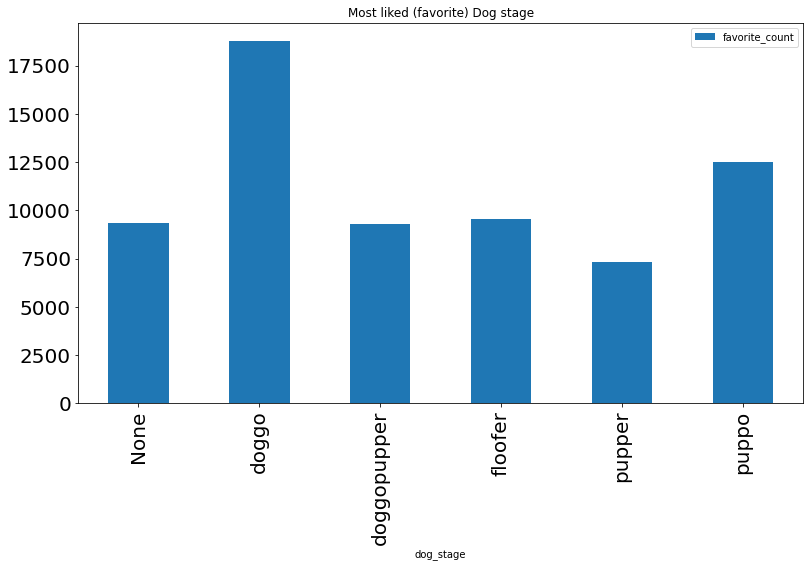

In [80]:
twitter_data.groupby(['dog_stage'])['favorite_count',].mean().plot(kind='bar', figsize= (13 ,7), title='Most liked (favorite) Dog stage', fontsize=20);

From the above visualization, it can be seen that ___doggo___ are the most liked dogs

 ***
From which source gave the most likes to the __WeRateDogs__ page?

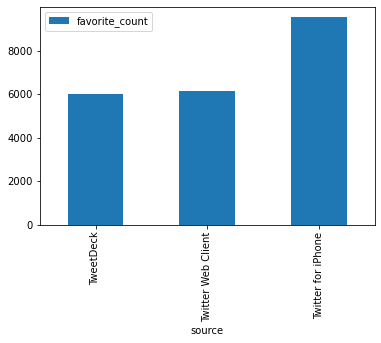

In [81]:
twitter_data.groupby(['source'])['favorite_count', ].mean().plot(kind='bar');

iPhone Users won the contest on avergae 

***
For analysis purpose, divide this dataset into two parts:
- those predicted to be dog breeds
- those not predicted to be dog breeds

In [82]:
breeds = twitter_data[twitter_data.p1_dog == True]
no_breeds = twitter_data[twitter_data.p1_dog == False]

In [83]:
no_breeds.p1_breed.value_counts().head(10)

seat belt      15
teddy          11
dingo           7
bath towel      6
siamese cat     6
tub             6
tennis ball     6
web site        5
minivan         4
llama           4
Name: p1_breed, dtype: int64

In [84]:
breeds.p1_breed.value_counts().head(10)

golden retriever      94
labrador retriever    66
pembroke              65
chihuahua             59
pug                   40
chow                  32
toy poodle            28
pomeranian            26
samoyed               23
malamute              22
Name: p1_breed, dtype: int64

From the analysis above,we can see insight at the most image predicted dog breed and non-dog breed using the `.value_counts()`

In [85]:
# Most liked breed prediction
breeds.groupby('p1_breed')['favorite_count'].mean().sort_values(ascending=False).head(10)

p1_breed
english springer       29523.250000
saluki                 27624.333333
standard poodle        21047.600000
french bulldog         20075.818182
bedlington terrier     18720.000000
briard                 18630.000000
afghan hound           17326.666667
giant schnauzer        17314.500000
leonberg               16423.000000
irish water spaniel    16400.000000
Name: favorite_count, dtype: float64

***

In [86]:
# Distribution function of 'favorite_count' and 'retweet_count'
def skew_plot(col_data, caption):
    col_data.plot(kind='density', title=caption)

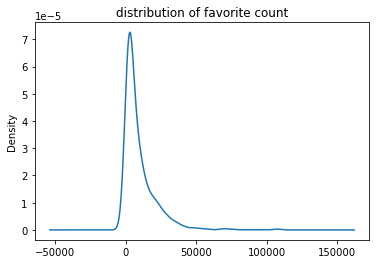

In [87]:
# Distribution of 'favorite_count'
skew_plot(twitter_data['favorite_count'], 'distribution of favorite count')

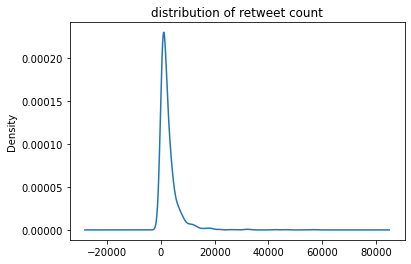

In [88]:
# Distribution of 'retweet_count'
skew_plot(twitter_data['retweet_count'], 'distribution of retweet count')

The above visualization shows the distribution of the __favorite_count__ and __retweet_count__ and it shows a positive skewness for both of them.

### Insights:
1. Doggos are the most liked dog stage, followed by pupppo, floofer, doggopupper and then pupper.
2. iPhone _tweeps_ averaged the most likes
3. The distribution of ___favorite_count__ and ___retweet_count___ are skew to the right which makes it a postive skew
4. The 'english_springer' image had most twitter likes
5. Positive Correlation between the Retweet and Likes

### Visualization

>#### Most tweet source

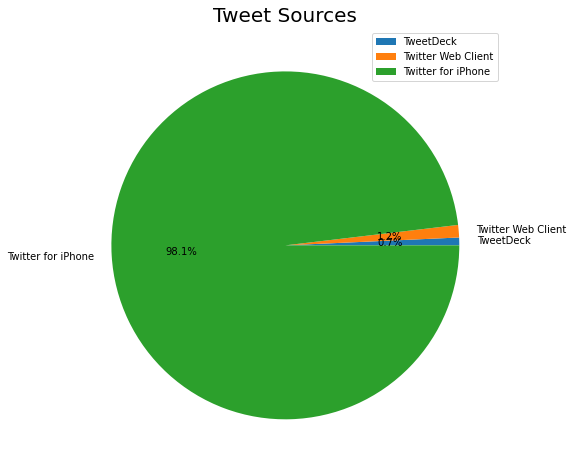

In [89]:
t_sources = twitter_data.groupby('source').count()[['tweet_id']]
t_sources.rename(columns={'tweet_id': 'source_count'}, inplace=True)
t_sources['source_percent'] = t_sources.source_count / t_sources.source_count.sum() * 100


t_sources['source_percent'].plot.pie(figsize=(10,8), autopct='%1.1f%%',
        explode=(0,0,0));
plt.title("Tweet Sources", {'fontsize': 20});
plt.legend(["TweetDeck", "Twitter Web Client", "Twitter for iPhone"]);
plt.ylabel("");

From the above visualization of the source column, the majority of the tweets came from iPhone users with more than 98%

>#### Likes Trend

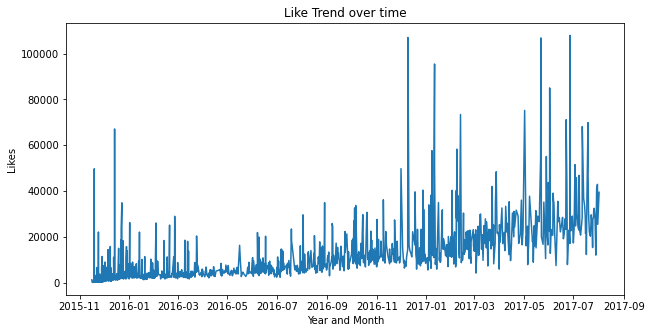

In [90]:
#sns.set_context()
plt.subplots(figsize=(10,5))
plt.plot(twitter_data.timestamp, twitter_data.favorite_count)
plt.title('Like Trend over time')
plt.xlabel('Year and Month')
plt.ylabel('Likes');

From the above visual of tweet favorite and the time, it can be deduce that there is an _Upward_ trend, that is, as the years progressives that there's an increase in the number of likes(favorites).

>#### Retweet and 'Favorite' Correlation

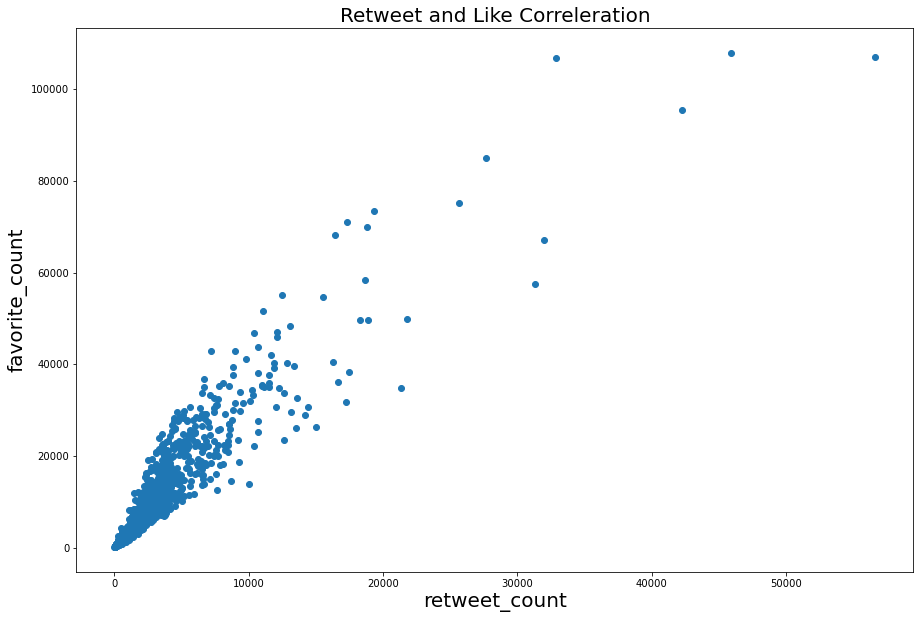

In [91]:
plt.figure(figsize=(15, 10))
plt.scatter(x=twitter_data.retweet_count, y=twitter_data.favorite_count)
plt.title('Retweet and Like Correleration', fontsize=20)
plt.xlabel('retweet_count', fontsize=20)
plt.ylabel('favorite_count', fontsize=20);

In [92]:
twitter_data.favorite_count.corr(twitter_data.retweet_count)

0.9227384138595841

The above visualization shows that the correlation between between the retweet and likes is a very postive.

<a id='conclude'></a>
> ## Conclusion

The Data Wrangling steps carried out in this twitter dataset can be iterated depending on what is noticed and want to be analysed or insighted.
<br>
Also, the analysis done and insight  drawn from this dataset in this notebook is one of many that can be harnessed.
<br>
In this notebook, we carried task by changing datatype, renaming columns for an easier analysis, dropping redundant columns, fixing column values and merging the datasets
<br>
Insights like:
- The most liked dog stage was seen which is __doggo__
- And that on an average, iPhone user gave the most tweet 
- The distribution of favorite and retweet were positively distributed i.e. skewed to the right.
- And the __Like trend__ was an _Upward_ one over time.
- Finally, the correlation between `favorite_count` and `retweet_count` was a postive one, which indicated that a person is most likely to like and retweet a tweet from the [@dog_rate](https://twitter.com/dog_rates?s=20&t=5Up0P4K1RgdKgF0eJf2PGw)'s page.